a) Antall muligheter er $4^p$

Sannsynligheten for en spesifikk profil er $\frac{1}{4}^{p}$ som kan argumenteres for gjennom gunstige på mulige eller ved uavhengighet.

In [54]:
plist = [5,10,20]
N = 5000000
for p in plist:
  print([p,0.25**(p),N*0.25**(p)])

[5, 0.0009765625, 4882.8125]
[10, 9.5367431640625e-07, 4.76837158203125]
[20, 9.094947017729282e-13, 4.547473508864641e-06]


b) La $A$ være begivenheten at mistenkt er bidragsyter og $B$ er at mistenkt også har DNA profil $\mathcal{S}$. 

Hvis mistenkt er bidragsyter og vi antar at det ikke er noen observasjonsfeil så må $B$ intreffe og dermed $P(B|A)=1$.

Når det gjelder $P(B|A')$, så betyr det at mistenkt ved en tilfeldighet har profilen $\mathcal{S}$, som vi regnet ut tidligere til å være $\frac{1}{4}^{p}$.

c) Da er

$\begin{align}
P(A|B)=&\frac{P(A)P(B|A)}{P(A)P(B|A)+P(A')P(B|A')}
     =\frac{\tfrac{1}{N}}{\tfrac{1}{N}+\tfrac{N-1}{N}\tfrac{1}{4}^{p}}
     =\frac{1}{1+(N-1)\tfrac{1}{4}^{p}}
\end{align}$

Av tallene nedenfor ser vi at hvor sikre vi er, er svært avhengig av $p$, men for rimelig stor $p$ så blir vi ganske sikre. 


In [3]:
N=5000000
plist=[5,10,20]
for p in plist:
    print([p,1/(1+(N-1)*0.25**(p))])

[5, 0.00020475810649141186]
[10, 0.1733591796414858]
[20, 0.9999954525480801]


Litt mer generelt (ikke spurt om i oppgaven):

Hvis nå $q$ er sannsynligheten for at den mistenkte er bidragsyter før vi tar hensyn til $B$, så er

$\begin{align}
P(A|B)=&\frac{P(A)P(B|A)}{P(A)P(B|A)+P(A')P(B|A')}
     =\frac{q}{q+(1-q)\tfrac{1}{4}^{3p}}
\end{align}$


In [55]:
N=5000000
q=0.5
plist=[5,10,20]
for p in plist:
  print([p,q/(q+(1-q)*0.25**(p))])

[5, 0.9990243902439024]
[10, 0.9999990463265931]
[20, 0.9999999999990905]


d) Vi har $n$ individer (forsøk) der hvert individ enten har profil ${\mathcal S}$ eller ikke. Hvis vi antar alle individers profiler er uavhengige og har samme sannsynlighet for den spesifikke profilen så er antagelsene for binomisk fordeling tilfredsstilt. 

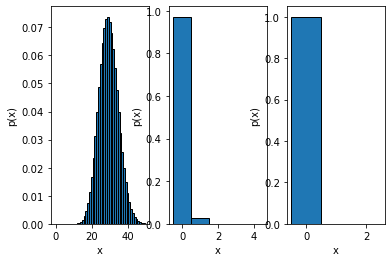

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
n=30000
plt.subplot(1,3,1)
p = 5
x=np.arange(0,50)
pr = 0.25**(p)
px = stats.binom.pmf(x,n,pr)
width=1
plt.bar(x,px,width,edgecolor="black")
plt.xlabel("x")
plt.ylabel("p(x)") 
plt.subplot(1,3,2)
p = 10
x=np.arange(0,5)
pr = 0.25**(p)
px = stats.binom.pmf(x,n,pr)
width=1
plt.bar(x,px,width,edgecolor="black")
plt.xlabel("x")
plt.ylabel("p(x)") 
plt.subplot(1,3,3)
p = 20
x=np.arange(0,3)
pr = 0.25**(p)
px = stats.binom.pmf(x,n,pr)
width=1
plt.bar(x,px,width,edgecolor="black")
plt.xlabel("x")
plt.ylabel("p(x)") 
plt.show()

Vi har $P(X=1)=\binom{n}{1}q^1(1-q)^{n-1}=nq(1-q)^{n-1}$ der $q=0.25^p$.

Nedenfor er også forventning til X gitt.

In [6]:
for p in plist:
    print([p,n*(0.25**p)*(1-(0.25**p))**(n-1)])

[5, 10, 20]
[5, 5.464592622356342e-12]
[10, 0.027803308904842363]
[20, 2.728484030875012e-08]


e) $P(C)=\frac{Gunstige}{Mulige}=\frac{n}{N}=\frac{30\,000}{5\,000,000}=\frac{3}{500}$

In [2]:
print(3/500)

0.006


Når vi vet $C$ så vet vi at en av de $n$ individene i databasen har profil ${\mathcal S}$. Ingen av de øvrige $n-1$ individer kan da ha profil ${\mathcal S}$. Det gir da sannsynlighet $P(X=1|C)=(1-0.25^p)^{n-1}$

In [7]:
p=[5,10,20]
n=30000
for p in plist:
    print([p,(1-0.25**p)**(n-1)])

[5, 1.8652476150976315e-13]
[10, 0.9717960812734662]
[20, 0.9999999727160688]


f) Vi kan igjen bruke Bayes setning:

$$
P(C|X=1)=\frac{P(C)P(X=1|C)}{P(C)P(X=1|C)+P(C')P(X=1|C')}
$$

Her trenger vi også å beregne $P(X=1|C')$. Da er vi i en binomisk situasjon og får at sannsynligheten blir $n(0.25^p)^1(1-0.25^p)^{n-1}$. Hvis vi setter inn, så får vi da

$$
\begin{align}
P(C|X=1)=&\frac{P(C)(1-0.25^p)^{n-1}}{P(C)(1-0.25^p)^{n-1}+P(C')n(0.25^p)^1(1-0.25^p)^{n-1}}
=\frac{P(C)}{P(C)+P(C')n0.25^p}\\
=&\frac{\tfrac{n}{N}}{\tfrac{n}{N}+\tfrac{N-n}{N}n0.25^p}
=\frac{n}{n+(N-n)n0.25^p}
\end{align}
$$

Når vi vet at det kun er 1 som har riktig profil X innenfor databasen og også vet at bidragsyter er innenfor databasen så må dette samsvare med at den ene person med riktig profil også er bidragsyter.

In [8]:
n=1
pC = n/N
for p in plist:
    q = 0.25**p
    pX1C=(1-q)**(n-1)
    pX1Cc=n*q*(1-q)**(n-1)
    print([p,pC/(pC+(1-pC)*n*q),(N-n)*q])
n=5000000
pC = n/N
for p in plist:
    q = 0.25**p
    pX1C=(1-q)**(n-1)
    pX1Cc=n*q*(1-q)**(n-1)
    print([p,pC/(pC+(1-pC)*n*q),(N-n)*q])

[5, 0.00020475810649141186, 4882.8115234375]
[10, 0.17335917964148578, 4.768370628356934]
[20, 0.9999954525480801, 4.547472599369939e-06]
[5, 1.0, 0.0]
[10, 1.0, 0.0]
[20, 1.0, 0.0]


In [10]:
#g)
n = 30000
pC = n/N
for p in plist:
    q = 0.25**p
    pX1C=(1-q)**(n-1)
    pX1Cc=n*q*(1-q)**(n-1)
    print([p,pC/(pC+(1-pC)*n*q),(N-n)*q])

[5, 0.00020599377512560792, 4853.515625]
[10, 0.17422327141835545, 4.7397613525390625]
[20, 0.9999954798317642, 4.520188667811453e-06]
